### 학과: IT미디어공학과
### 학번: 20191035
### 이름 : 장혜림

### <Step1. 탐색> : 데이터의 기초 정보 살펴보기

[1.1] Chipotle 데이터셋의 기본 정보 출력하기

In [ ]:
# 로컬 디스크 데이터를 가져오기 위해 google.colab에서 files라는 package를 import한다.
from google.colab import files

# files.upload()에 의해 [파일 선택] 버튼이 생성된다.
uploaded = files.upload()

Saving chipotle.tsv to chipotle.tsv


In [ ]:
# pandas와 추가적으로 io 패키지가 필요하다.
import pandas as pd
import io

# read_csv()으로 업로드된 파일을 Byte단위로 읽어서 chipo 데이터프레임을 생성한다.
chipo = pd.read_csv(io.BytesIO(uploaded['chipotle.tsv']), sep='\t') 

In [ ]:
## chipo 데이터프레임의 크기를 출력하시오.
## print() 생략 가능함.
chipo.shape

(4622, 5)

In [ ]:
## chipo 데이터프레임의 기본정보를 출력하시오.
## print() 생략 가능함
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


[1.2] Chipotle 데이터셋의 행과 열, 데이터 확인하기

In [ ]:
## chipo 데이터프레임에서 상위 10개의 행을 출력하시오.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
## chipo 데이터프레임의 컬럼명들을 출력하시오.
## print() 생략 가능함
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

-----

[1.3] describe()로 수치형 피처들의 기초 통계량 확인하기

In [ ]:
## chiop 데이터프레임의 주문번호(order_id) 컬럼을 문자열로 형변환하시오.
chipo['order_id'] = chipo['order_id'].astype(str)

In [ ]:
## chipo 데이터프레임의 기초통계량을 출력하시오.
# print(chipo.describe()) 
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


-----

[1.4] unique()로 범주형 피처의 개수 출력하기

In [ ]:
## chiop 데이터프레임의 아이템명(item_name) 컬럼의 유일한 범주(category)의 값들을 출력하시오.
## print() 생략 가능함.
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [ ]:
## chiop 데이터프레임의 아이템명(item_name) 컬럼의 유일한 범주(category)의 개수를 출력하시오.
## print() 생략 가능함

len(chipo['item_name'].unique())

50

-----

### <Step2. 인사이트의 발견> : 탐색과 시각화

[2.1] 가장 많이 주문한 아이템 Top 10

In [ ]:
## chiop 데이터프레임의 아이템명(item_name) 컬럼의 값별로 개수를 출력하시오
## 처음 10개만 출력하시오.

item_count = chipo['item_name'].value_counts()[:10]
print(item_count)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64


In [ ]:
# [기초] start=1 옵션을 주면 인덱스가 1부터 시작한다.
for i, letter in enumerate(['A', 'B', 'C'], start=1):
   print(i, letter)

1 A
2 B
3 C


In [ ]:
## 가장 많이 주문한 아이템 Top 10 구하기
## item_count를 반복가능한 iterable객체로 변환하시오.
## in 다음 문장을 완성하시오.
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


[2.2] 아이템별 주문 횟수 구하기

In [ ]:
## chiop 데이터프레임의 아이템(item_name)별 주문(order_id) 횟수를 구하시오.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] 

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

[2.3] 아이템별 주문 총수량 구하기

In [ ]:
## chiop 데이터프레임의 아이템(item_name)별 주문 총 수량(quantity)을 구하시오.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] 

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

-----

[2.4] 시각화로 분석 결과 살펴보기
  * 아이템별 주문 총수량을 막대그래프로 시각화한다.

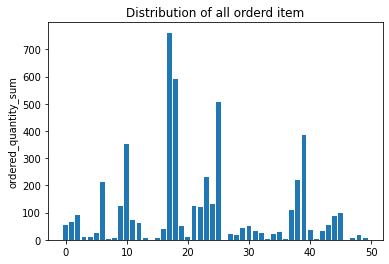

In [ ]:
# 주피터노트북에서 그래프를 출력가능하도록 선언하는 명령어이다.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 아이템별 총수량(item_quantity)의 index를 리스트로 변환하시오
item_name_list = item_quantity.index.tolist()

## item_name_list의 길이 만큼 인덱스 배열을 만드시오.
x_pos = np.arange(len(item_name_list))

## 아이템별 총수량(item_quantity)의 값들을 리스트로 변환하시오
order_cnt = item_quantity.values.tolist()

## 막대그래프 그리시오.
## (x축 리스트, y축 리스트, align='center') 매개변수를 지정하시오.  
plt.bar(x_pos, order_cnt, align='center')

# y축 레이블을 지정한다.
plt.ylabel('ordered_quantity_sum')
# 그래프 타이틀을 지정한다.
plt.title('Distribution of all orderd item')
# 그래프를 출력한다.
plt.show()

-----

### <Step3. 데이터 전처리> 전처리 함수 사용하기

[3.1] apply()와 lambda 함수를 이용한 데이터 전처리하기
* item_price가 $2.39와 같이 문자열타입(object)이기 때문에 기초 통계량을 구할수 없다.

* 수치 데이터로 사용하기 위해서는 $기호를 제거해주는 전처리 작업이 필요하다.


In [ ]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [ ]:
## chipo 데이터프레임의 가격(item_price)컬럼의 $를 제거하시오.
## 람다함수를 사용하시오.
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

-----

[4.1] 주문당 평균 판매금액 출력하기

In [ ]:
# chipo 데이터프레임에서 상위 10개의 행을 보여준다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [ ]:
## chipo 데이터프레임의 주문(order_id)당 총 판매금액(item_price)을 구하시오.
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [ ]:
## chipo 데이터프레임의 주문(order_id)당 평균 판매금액(item_price)을 구하시오.
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

[4.2] 한 주문에 100달러 이상 사용한 주문 번호(id) 출력하기

In [ ]:
## 주문번호('order_id')별 합계를 구하시오.
chipo_orderid_group = chipo.groupby('order_id').sum()
print(chipo_orderid_group)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]


In [ ]:
## 주문번호별 합계가 저장된 chipo_orderid_group 에서
## 가격(item_price)이 100 이상을 구하시오.
results = chipo_orderid_group[chipo_orderid_group.item_price >= 100]
print(results[:10])

          quantity  item_price
order_id                      
1443            35      160.74
1483            14      139.00
1786            20      114.30
205             12      109.90
491             10      102.00
511             17      104.59
691             11      118.25
926             23      205.25


[4.3] 각 아이템의 가격 구하기

In [ ]:
## 1) chipo 데이터프레임에서 수량(quantity)이 1인 경우만을 선택하시오.
chipo_one_item = chipo[chipo.quantity == 1]

## 2) chipo_one_item 에서 아이템명(item_name)별 최저값을 구하시오
price_per_item = chipo_one_item.groupby('item_name').min()

## 3) price_per_item 에서 가격(item_price) 기준으로 내림차순 정렬하시오
## 처음 10개만 출력하시오.
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [ ]:
# price_per_item.index는 아이템이름(item_name)이다.
print(price_per_item.index.tolist())

['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze', 'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl', 'Steak Burrito', 'Steak Crispy Tacos', 'Steak Salad', 'Steak Salad Bowl', 'Steak Soft Tacos', 'Veggie Bowl', 'Veggie Burrito', 'Veg

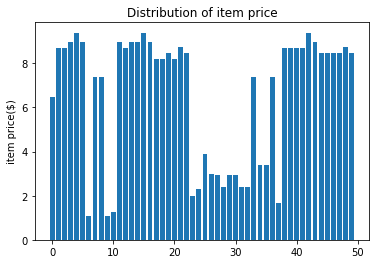

In [ ]:
# 아이템 가격 분포 그래프를 출력합니다.

## price_per_item 의 인덱스를 리스트로 변환하시오
item_name_list = price_per_item.index.tolist()

## item_name_list 의 길이 만큼 인덱스 배열을 만드시오
x_pos = np.arange(len(item_name_list))


## price_per_item 데이터프레임의 가격(item_price) 피처를 리스트로 변환하시오.
y_pos =  price_per_item['item_price'].tolist()
 
# 막대그래프 객체를 생성한다.
plt.bar(x_pos, y_pos, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()